<a href="https://colab.research.google.com/github/jibbsmathew/TechWorkers-MentalHealthAnalysis/blob/main/mental_health_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install seaborn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import numpy as np
import os, sys, itertools, re

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter(action='ignore')

In [3]:
if 'google.colab' in sys.modules:
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [4]:
df= pd.read_csv('data/survey.csv')

In [5]:
sns.__version__

'0.11.0'

<center> At first, let's exploring mental health in the tech industry in 2014. Then, comparing results with data from 2016 and adding data from word-happiness in 2016. </center>

# <center>Exploring mental health in the tech industry in 2014</center>

Some information about explored data:

- "*This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace*".
- **Features:**

<table>
<thead>
<tr><th>Feature name</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>Timestamp</td><td> - </td></tr>
<tr><td>Age</td><td> - </td></tr>
<tr><td>Gender</td><td> - </td></tr>
<tr><td>Country</td><td> - </td></tr>
<tr><td>State</td><td> (only for US) </td></tr>
<tr><td>Self employed</td><td> Are you self-employed? </td></tr>
<tr><td>Family history</td><td> Family history of mental illness </td></tr>
<tr><td>Treatment</td><td>Is treatment for a mental health condition was?</td></tr>
<tr><td>Work interfere</td><td> Is mental health condition affects work? </td></tr>
<tr><td>No employees</td><td> The number of employees in your company or organization </td></tr>
<tr><td>Remote work</td><td> Having remote work (outside of an office) at least 50% of the time </td></tr>
<tr><td>Tech company</td><td> The employer is primarily a tech company/organization </td></tr>
<tr><td>Benefits</td><td> Providing mental health benefits by the employer </td></tr>
<tr><td>Care options:</td><td> Providing options for mental health care by the employer </td></tr>
<tr><td>Wellness program</td><td> Discussion about mental health as part of an employee wellness program by the employes </td></tr>
<tr><td>Seek help</td><td> Providing resources by the employer to learn more about mental health issues and how to seek help </td></tr>
<tr><td>Anonymity</td><td> Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources</td></tr>
<tr><td>Leave</td><td> How easy is it for you to take medical leave for a mental health condition? </td></tr>
<tr><td>Mental-health consequence: </td><td>  Having negative consequences caused by discussing a mental health issue with your employer</td></tr>
<tr><td>Phys-health consequence</td><td> Having negative consequences caused by discussing a physical health issue with your employer </td></tr>
<tr><td>Coworkers</td><td> Would you be willing to discuss a mental health issue with your coworkers?</td></tr>
<tr><td>Supervisor</td><td> Would you be willing to discuss a mental health issue with your direct supervisor(s)? </td></tr>
<tr><td>Mental health interview:</td><td> Would you bring up a mental health issue with a potential employer in an interview? </td></tr>
<tr><td>Phys health interview</td><td> Would you bring up a physical health issue with a potential employer in an interview? </td></tr>
<tr><td>Mental vs Physical</td><td> Do you feel that your employer takes mental health as seriously as physical health? </td></tr>
<tr><td>Obs consequence</td><td> Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? </td></tr>
<tr><td>Comments</td><td> Any additional notes or comments </td></tr>
</tbody>
</table>


Well, we have 27 columns (features) and 1259 rows (values - candidates, who answered the questions):

In [57]:
data=df.head()
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data
# Dropping

data = data.drop(columns=['Timestamp'])

Have we got any *NULL-values*? Let's plot them:

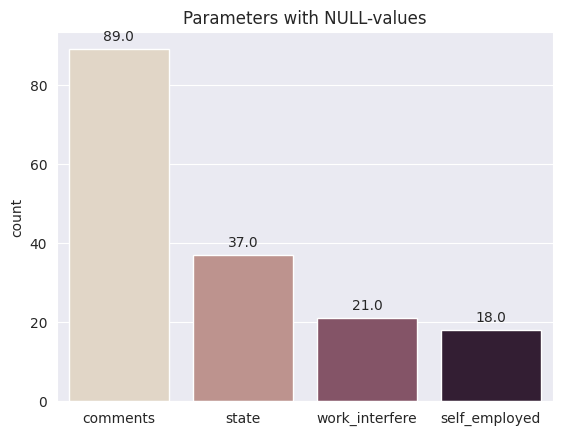

In [8]:
null_values = data.isnull().sum().sort_values(ascending=False).to_frame()
null_values = null_values.loc[null_values[0] != 0]
ax = sns.barplot(x=null_values.index, y=null_values[0], data=null_values,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax = ax.set(ylabel="count", title='Parameters with NULL-values')

## Treatment, Family history and Work interfere

Explore our "target" value - treatment.

Candidates answered 'yes', if treatment is for a mental health condition was, and 'no' if treatment was not.


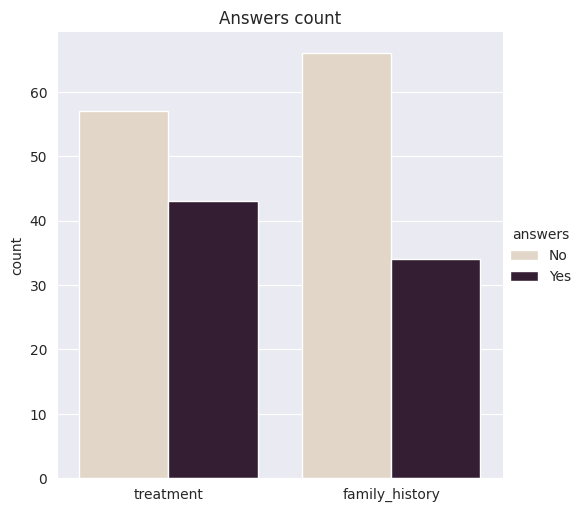

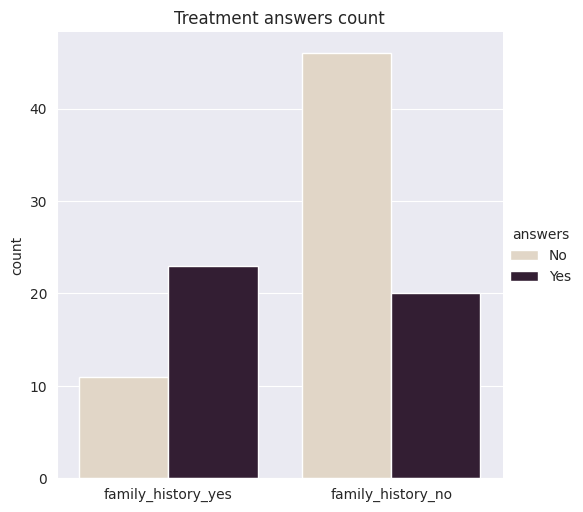

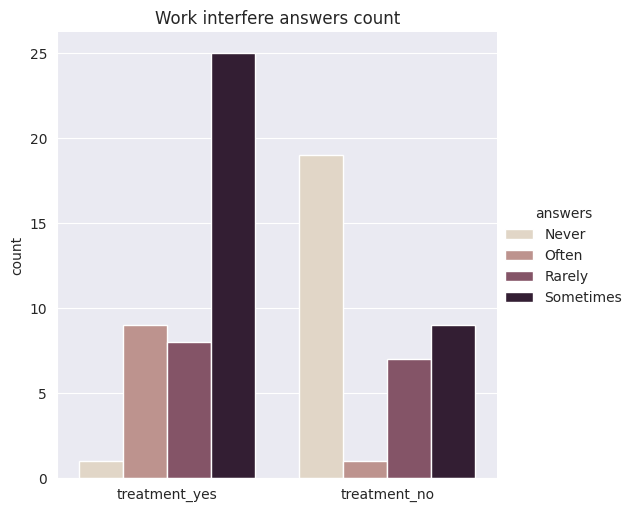

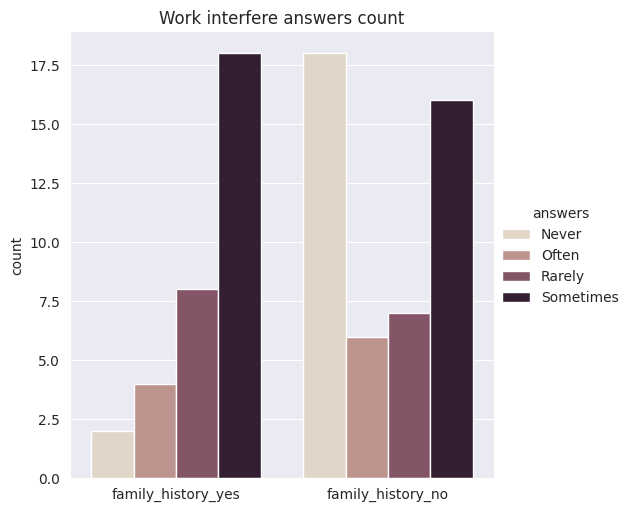

In [9]:
treatment_values = data.treatment.value_counts().to_frame()
family_history_values = data.family_history.value_counts().to_frame()
plot_frame = pd.DataFrame({'answers': ['No', 'Yes'], 'treatment': treatment_values['treatment'], 'family_history': family_history_values['family_history']})
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment", value_name="family_history")
sns.factorplot(x='treatment', y='family_history', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Answers count')

treatment_values_yes = data.treatment.loc[data.family_history == 'Yes'].value_counts().to_frame()
treatment_values_no = data.treatment.loc[data.family_history == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': treatment_values_yes['treatment'], 'family_history_no': treatment_values_no['treatment']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Treatment answers count')

work_interfere_yes = data.work_interfere.loc[data.treatment == 'Yes'].value_counts().to_frame()
work_interfere_no = data.work_interfere.loc[data.treatment == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'treatment_yes': work_interfere_yes['work_interfere'], 'treatment_no': work_interfere_no['work_interfere']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_yes", value_name="treatment_no")
sns.factorplot(x='treatment_yes', y='treatment_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')

work_interfere_yes = data.work_interfere.loc[data.family_history == 'Yes'].value_counts().to_frame()
work_interfere_no = data.work_interfere.loc[data.family_history == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': work_interfere_yes['work_interfere'], 'family_history_no': work_interfere_no['work_interfere']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')

In [10]:
import plotly.express as px
# How does Family History of Mental Illness known through Different Ages of People?
fig = px.histogram(data, x='Age', color='family_history', labels={'family_history':'Mental Illness Known in Family'},
                   template = "plotly_white",color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(title_text="Family History of Mental Illness known through Different Ages of People", title_x=0.5)
fig.show()

# INFERENCE
Here, we can see that most people who have done the survey are from ages 25 to 35 where the highest peak is around 32-33 .
As we go away from the highest peak, we can see that the values further away are rarer. So people from ages below 20 and people from ages above 50 have less number of people participating in the survey.
Additionally, we can also see how people have know about their family history. There is a great deal of overlapping of values for both people who have family history of mental health issues and those who don’t. So all ages have aware of Mental Health issues faced by their members of families
The distribution of people who have family history of mental health issues has higher and wider distribution than people who have no family history of mental health issues.

# How do people who have sought treatment for medical health condition feel about it interfering with their work?

In [11]:
treat_work = data.loc[:,['treatment','work_interfere']]
a = np.ones(treat_work.shape[0])
treat_work['to_count']= a

In [12]:
table = pd.pivot_table(treat_work, values='to_count', index='treatment',columns='work_interfere', aggfunc=np.sum)

In [13]:
fig = px.bar(table, x=table.index, y=table.columns, labels={'work_interfere': 'Work Interference',
                                                            'treatment': 'Have sought treatment?'},
            template = "plotly_white",color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(title_text="Opinions of People on Work Interference after Seeking Treatment", title_x=0.5,
                 barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# INFERENCE
We can see that majority of the people have undergone treatment for some Mental Health Issue.
The people who have taken treatment show that their mental health issue really interferes them in their work.
By the ratio of the sizes of stacks for people who have sought treatment , we can see that total count of people facing no interference (‘Never’) was the least effective while people who feel their work is disturbed sometimes (‘sometimes’) are the most effective of them all.
On the contrary, if we see the sizes of stacks of people who haven’t sought treatment, we can see that most people support the fact of no interference with work(‘never’) than the fact that it may interfere often, sometimes, or rarely.
Significantly we can say that people who have taken treatment have sometimes felt their mental health issue interfering with their work. So it rules every other possibility since its stack size is bigger than any others.

# Is there a correlation between the employer providing resources for mental health issues and workers' willingness to reach out for help to their supervisors?

In [14]:
corr = pd.crosstab(data.seek_help,data.supervisor,
                   rownames=['Employer providing help'],
                   colnames=['Employee reaching out to Supervisor'],
                   dropna=False)
corr

Employee reaching out to Supervisor,No,Some of them,Yes
Employer providing help,,,
Don't know,8,6,16
No,22,9,25
Yes,2,3,9


In [15]:
fig = px.imshow(corr,color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title_text="Correlation between Employer providing Help & Employee reaching out to Supervisor",
                  title_x=0.5)
#fig.update_xaxes(side="top")

fig.show()

# INFERENCE
From this heat map, we can see that employees who are provided with help do prefer to seek help from their supervisor most of the time (100 -140 ) and least prefer to not ask when provided with help (=<60).
But while the employer doesn’t provide help, most people still seek help from their supervisor (>240) and also most don’t (200-220)
An average amount of people are not aware if their employer is providing help or not for Mental Health Issue. (No awareness)

# How does the features of how and where a person works influence their frequency to take leave for a mental health issue?

In [16]:
leaves = data['leave'].map({'Very easy': 1, 'Somewhat easy': 2, "Don't know": 3, 'Somewhat difficult':4, 'Very difficult':5})
data['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [17]:
fig = px.parallel_categories(data, dimensions=['remote_work', 'tech_company', 'benefits', 'care_options',
                                                 'wellness_program', 'seek_help', 'anonymity', 'leave'],
                             labels={'remote_work':'working_far','benefits':'provide benefits',
                                     'seek_help':'provide_help','leave':'take_leave'},
                            color = leaves, color_continuous_scale=px.colors.sequential.Inferno_r)
fig.update_layout(title_text="Different Features Influencing The frequency to Take Leave",title_x=0.5,
                  coloraxis_showscale=False)
fig.show()

# How willing are people of particular gender to share their mental health issue with their colleagues?

In [18]:
a = pd.crosstab(data.Gender,data.coworkers,dropna=False)

In [19]:
gen_cowork = data.loc[:,['Gender','coworkers']]
a = np.ones(gen_cowork.shape[0])
gen_cowork['to_count']= a
tab = pd.pivot_table(gen_cowork, values='to_count', index='Gender',columns='coworkers', aggfunc=np.sum)

In [20]:
fig = px.bar(tab, x=tab.index, y=tab.columns, barmode='group', labels={'coworkers': 'Discussing with coworkers'},
            color_discrete_sequence=px.colors.qualitative.Light24, template='plotly_white')
fig.update_layout(title_text="People of different Genders discussing MH issues with Coworkers", title_x=0.5,
                  xaxis={'categoryorder':'total descending'})
fig.show()

## Age, Gender and Treatment

- At the first, we explore the "Gender" column;
- At the second, we explore the "Age" column;
- Exploring "treatment" from age-gender point.

Gender unique values:

In [21]:
gender_values = data.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
Male,51
male,16
M,10
Female,8
female,4
m,3
F,2
Male-ish,1
maile,1
Trans-female,1


After cleaning "Gender"-column:

In [22]:
# clean "Gender" column

data.Gender = data.Gender.str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
         "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter",
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]

data.Gender.loc[data.Gender.isin(male)] = 'male'
data.Gender.loc[data.Gender.isin(female)] = 'female'
data.Gender.loc[data.Gender.isin(other)] = 'others'

gender_values = data.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
male,83
female,15
others,2


In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [24]:
# Feature engineering

age = []
for i in data.Age:
    if (i<18) or (i>99):
        age.append(31)   # Median
    else:
        age.append(i)

data['Age'] = age

In [25]:

# Univariate visualization of non-categorical variables



fig = make_subplots(rows = 2, cols=1)

fig.append_trace(go.Bar(
                        y = data['Country'].value_counts(),
                        x = data['Country'].value_counts().index,
                        name = 'Observations from Countries (Log)',
                        text = data['Country'].value_counts(),
                        textfont = dict(size = 10,
                                        family = 'monospace'),
                        textposition = 'outside',
                        marker=dict(color="#6aa87b")
                        ), row=1, col=1)

fig.append_trace(go.Histogram(
                        x = data['Age'],
                        nbinsx = 8,
                        text = ['16', '500', '562', '149', '26', '5', '1'],
                        marker =  dict(color="#6aa87b")),
                        row=2, col=1)


# For Subplot : 1

fig.update_xaxes(
        row=1, col=1,
        tickfont = dict(size=10, family = 'monospace'),
        tickmode = 'array',
        ticktext = data['Country'].value_counts().index,
        tickangle = 60,
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(type = 'log',
        row=1, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width= 1.2,
                  opacity=0.6,
                  row = 1, col = 1)

fig.update_xaxes(range=[-1,48], row = 1, col = 1)

# For Subplot : 2

fig.update_xaxes(
        title = dict(text = 'Age',
                     font = dict(size = 15,
                                 family = 'monospace')),
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace', color = 'black'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width = 2,
                  opacity = 0.6,
                  row = 2, col = 1)


fig.update_layout(height=1200, width=900,
                  title = dict(text = 'Univariate visualization of non-categorical variables<br>1. Observation from Countries(Log)<br>2. Ages Count',
                               x = 0.5,
                               font = dict(size = 16, color ='#27302a',
                               family = 'monospace')),
                  plot_bgcolor='#edf2c7',
                  paper_bgcolor = '#edf2c7',
                  showlegend = False)

fig.show()

In [26]:
male_country   = data[data['Gender'] == 'male'][['Country', 'Gender']]
female_country = data[data['Gender'] == 'female'][['Country', 'Gender']]
male_country   = male_country.value_counts()
female_country = female_country.value_counts()

male_country   = pd.DataFrame(male_country).reset_index().rename(columns={0:'count'}).head(15)
female_country = pd.DataFrame(female_country).reset_index().rename(columns={0:'count'}).head(15)
male_country['count'] = male_country['count'] * -1

In [27]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{}, {}]],
                    shared_yaxes=True,
                    horizontal_spacing=0)

fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = male_country['count'],
                 text = male_country['count'],
                 textfont = dict(size = 10, color = '#6aa87b'),
                 textposition = 'outside',
                 name = 'Male responses',
                 marker_color='#6aa87b',
                 orientation = 'h'),
                 row=1, col=1)

fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = female_country['count'],
                 text = female_country['count'],
                 textfont = dict(size = 10, color = '#913f3f'),
                 textposition = 'outside',
                 name = 'Female responses',
                 marker_color='#913f3f',
                 orientation = 'h'),
                 row=1, col=2)


fig.update_xaxes(
        tickfont = dict(size=15),
        tickmode = 'array',
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(showgrid=False,
                 categoryorder='total ascending',
                 ticksuffix=' ',
                 showline=False)

fig.update_layout(
                  font_family   = 'monospace',
                  title         = dict(text = 'Gender of the survey respondents across Countries', x = 0.525),
                  margin        = dict(t=80, b=0, l=70, r=40),
                  hovermode     = "y unified",
                  plot_bgcolor  = '#edf2c7',
                  paper_bgcolor = '#edf2c7',
                  font          = dict(color='black'),
                  legend        = dict(orientation="h",
                                       yanchor="bottom", y=1,
                                       xanchor="center", x=0.5),
                  hoverlabel    = dict(bgcolor="#edf2c7", font_size=13,
                                      font_family="Monospace"))


fig.show()

In [28]:
male   = data[data.Gender == 'male'].drop(['Gender', 'Age', 'Country'], axis=1)
female = data[data.Gender == 'female'].drop(['Gender', 'Age', 'Country'], axis=1)
other  = data[data.Gender == 'others'].drop(['Gender', 'Age', 'Country'], axis=1)

In [29]:
male

,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MN,No,No,No,Never,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN
96,MO,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
97,NaN,No,Yes,Yes,Sometimes,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Yes,No,No,NaN
98,AZ,No,No,Yes,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No,NaN


In [30]:
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,male,United States,MN,No,No,No,Never,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN
96,24,male,United States,MO,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
97,31,male,Mexico,NaN,No,Yes,Yes,Sometimes,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Yes,No,No,NaN
98,33,male,United States,AZ,No,No,Yes,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No,NaN


In [31]:
buttons = []
i = 0
vis = [False] * 26

for col in male.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 26

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in male.columns:
    fig.add_trace(go.Pie(
             values = male[col].value_counts(),
             labels = male[col].value_counts().index,
             title = dict(text = 'Male distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)


for col in female.columns:
    fig.add_trace(go.Pie(
             values = female[col].value_counts(),
             labels = female[col].value_counts().index,
             title = dict(text = 'Female distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('YlGn').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.62,
                        y = 0.91,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()

In [32]:
# Choosing countries with more than 30 observations

us = data[data.Country == 'United States'].drop(['Age', 'Country'], axis=1)
uk = data[data.Country == 'United Kingdom'].drop(['Age', 'Country'], axis=1)
cd = data[data.Country == 'Canada'].drop(['Age', 'Country'], axis=1)
gr = data[data.Country == 'Germany'].drop(['Age', 'Country'], axis=1)

In [33]:
buttons = []
i = 0
vis = [False] * 26

for col in us.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 26

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    vertical_spacing = 0.1)

for col in us.columns:
    fig.add_trace(go.Pie(
             values = us[col].value_counts(),
             labels = us[col].value_counts().index,
             title = dict(text = 'U.S. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)

for col in uk.columns:
    fig.add_trace(go.Pie(
             values = uk[col].value_counts(),
             labels = uk[col].value_counts().index,
             title = dict(text = 'U.K. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)


for col in cd.columns:
    fig.add_trace(go.Pie(
             values = cd[col].value_counts(),
             labels = cd[col].value_counts().index,
             title = dict(text = 'Canada distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),2,1)

for col in gr.columns:
    fig.add_trace(go.Pie(
             values = gr[col].value_counts(),
             labels = gr[col].value_counts().index,
             title = dict(text = 'Germany distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),2,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('RdBu_r').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=2, col=1, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=2, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                   paper_bgcolor = '#edf2c7',
                  height = 1200,
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 0.96,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.48, y = 1, yref = "paper", align = "left")])

for i in range(0,88):
    fig.data[i].visible = False

fig.data[0].visible = True
fig.data[22].visible = True
fig.data[44].visible = True
fig.data[66].visible = True

fig.show()

In [34]:
pip install wordcloud

Checking age values:

Well, for the first, let's find outliers with  Percentile Capping (Winsorization) method:

    If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Country and trearment",

    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State and trearment",

    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [36]:
# Explore important features with count = 5:
import plotly.express as px


fig = px.parallel_categories(data[['treatment', 'obs_consequence', 'family_history',
                                   'work_interfere']])
fig.show()

In [37]:
#Explore important features with count = 4:
fig = px.parallel_categories(data[['treatment', 'care_options',
                                   'anonymity', 'Gender', 'benefits', 'mental_health_consequence']])
fig.show()

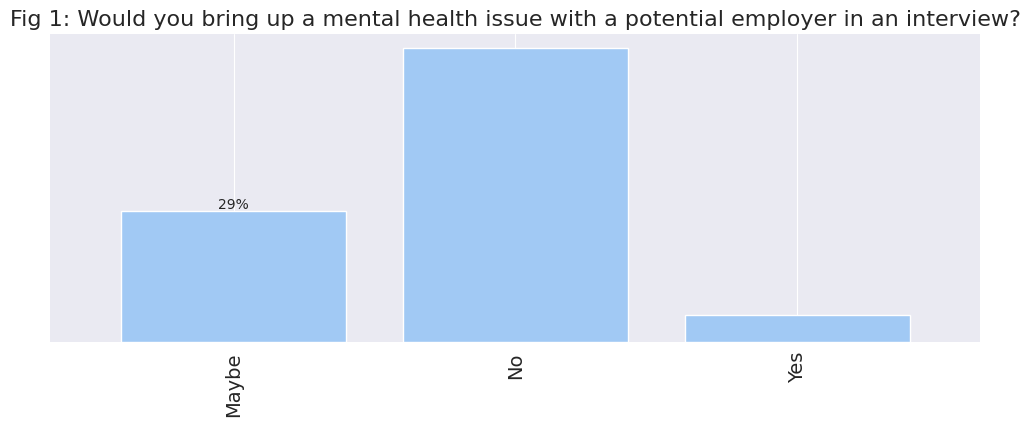

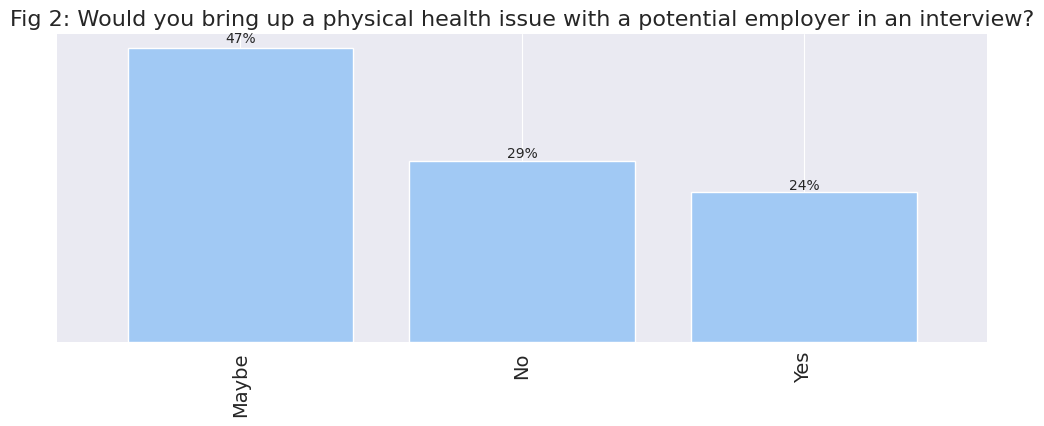

In [38]:
s = data.mental_health_interview.value_counts(normalize=True).sort_index()
ax = s.plot(kind='bar',figsize=(12,4),width = 0.8)
plt.title("Fig 1: Would you bring up a mental health issue with a potential employer in an interview?",fontsize= 16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

    plt.show()
k = data.phys_health_interview.value_counts(normalize=True).sort_index()
ay = k.plot(kind='bar', figsize=(12,4),width=0.8)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
# Add the annotations
for p in ay.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ay.annotate(f'{height:.0%}', (x + width/2, y +height*1.02), ha='center')
plt.title("Fig 2: Would you bring up a physical health issue with a potential employer in an interview?", fontsize=16)
plt.show()

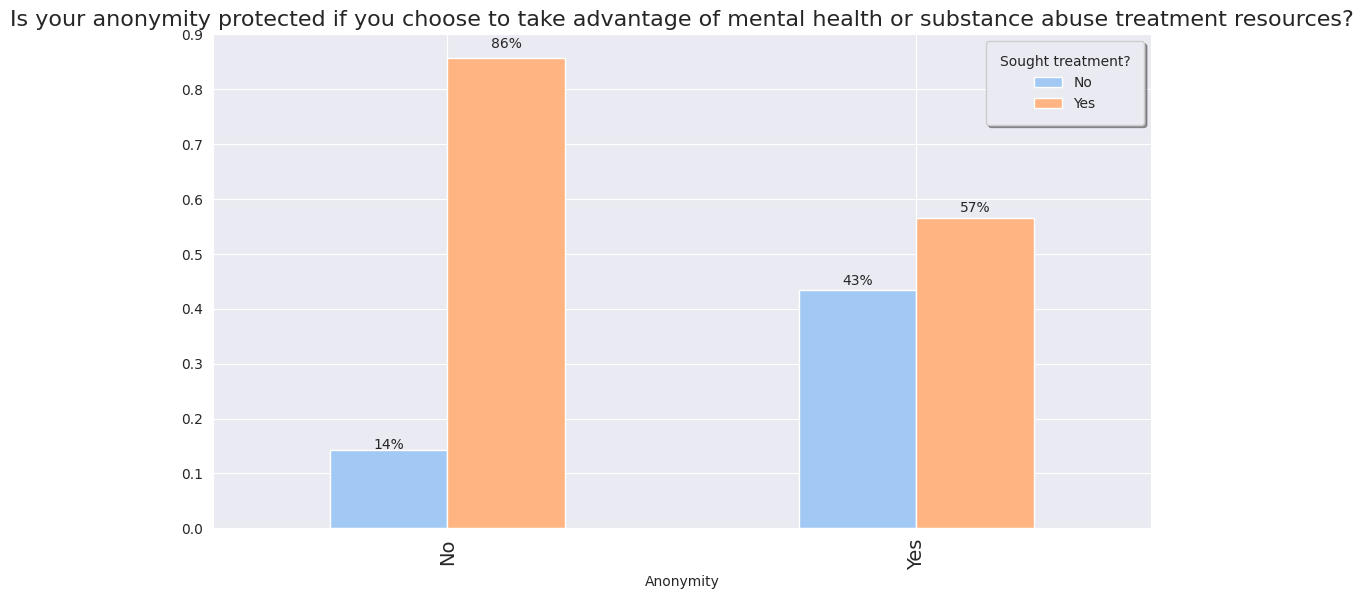

Fisher's Exact Test P-Value: 0.21463306808134394


treatment,No,Yes,All
anonymity,,,
No,1,6,7
Yes,10,13,23
All,11,19,30


In [39]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

adf = data[(data.anonymity == 'Yes') | (data.anonymity == 'No')]
s = pd.crosstab(adf.anonymity, adf.treatment, margins=False)
plt.rcParams["figure.figsize"] = (10, 6)
anp = pd.crosstab(adf.anonymity, adf.treatment,normalize='index').plot.bar()
for p in anp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    anp.annotate(f'{height:.0%}', (x+width/2, y +height*1.02), ha='center')
plt.title("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?",fontsize=16)
plt.legend(title="Sought treatment?",fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel("Anonymity")
plt.tight_layout()
plt.xticks(fontsize=14)
plt.show()


oddsratio, pvalue = stats.fisher_exact(s)
print("Fisher's Exact Test P-Value:", pvalue)
pd.crosstab(adf.anonymity, adf.treatment, margins=True)


In [40]:
from sklearn.ensemble import IsolationForest


def winsorization_outliers(df):
    out=[]
    for i in df:
        q1 = np.percentile(df , 1)
        q3 = np.percentile(df , 99)
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
    return out

outliers = winsorization_outliers(data.Age)

Outliers: [50]


Dropping outliers and check distribution:

<Axes: xlabel='Age', ylabel='Count'>

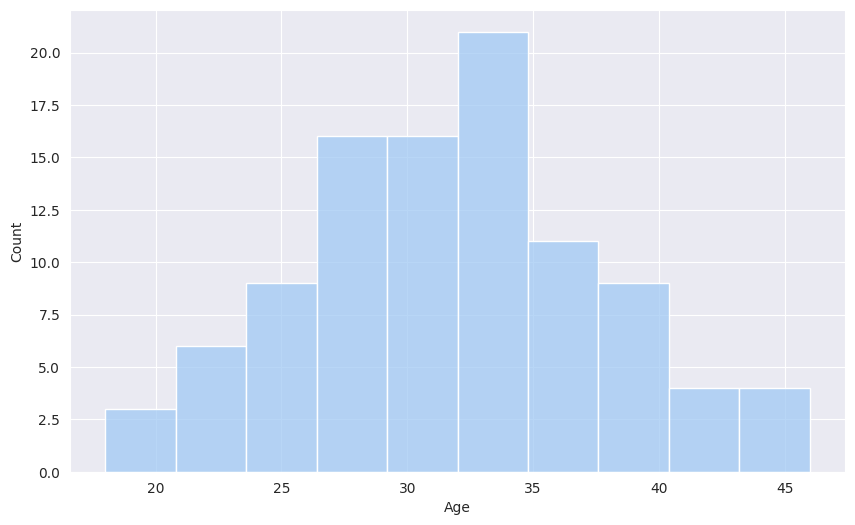

In [41]:
# drop age-outliers

data_age = data.loc[~data.Age.isin(outliers)]
sns.histplot(data=data_age, x="Age")

"treatment" analysis  from the age-gender point:

In [42]:
import plotly.express as px

fig = px.violin(data_age, y="Age", x="treatment", color="Gender", box=True, points="all")
fig.show()

- In both cases, the median man age is higher than female;

- If treatment was, the max men age is higher than women, and if treatment was not, the max women age is higher than men;

- Women and others have more cases in treatment-yes category.

Explore outliers data:

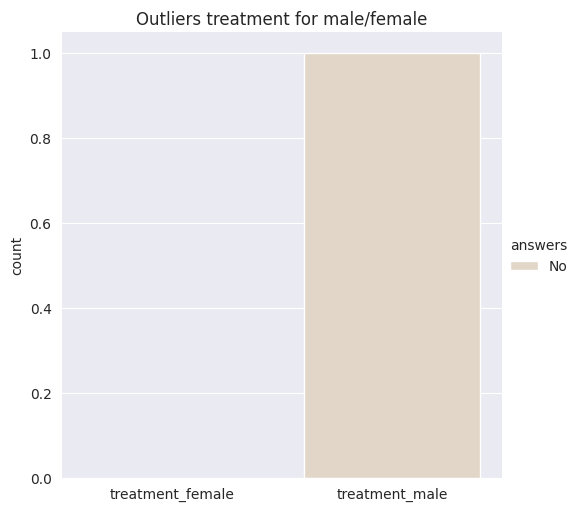

In [43]:
data_outliers = data.loc[data.Age.isin(outliers)]

treatment_female = data_outliers.treatment.loc[data_outliers.Gender == 'female'].value_counts().to_frame()
treatment_male = data_outliers.treatment.loc[data_outliers.Gender == 'male'].value_counts().to_frame()

plot_frame = pd.DataFrame({'treatment_female': treatment_female['treatment'], 'treatment_male': treatment_male['treatment']})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_female", value_name="treatment_male")
sns.factorplot(x='treatment_female', y='treatment_male', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Outliers treatment for male/female')

## Coutry, State

- Exploring country and state columns

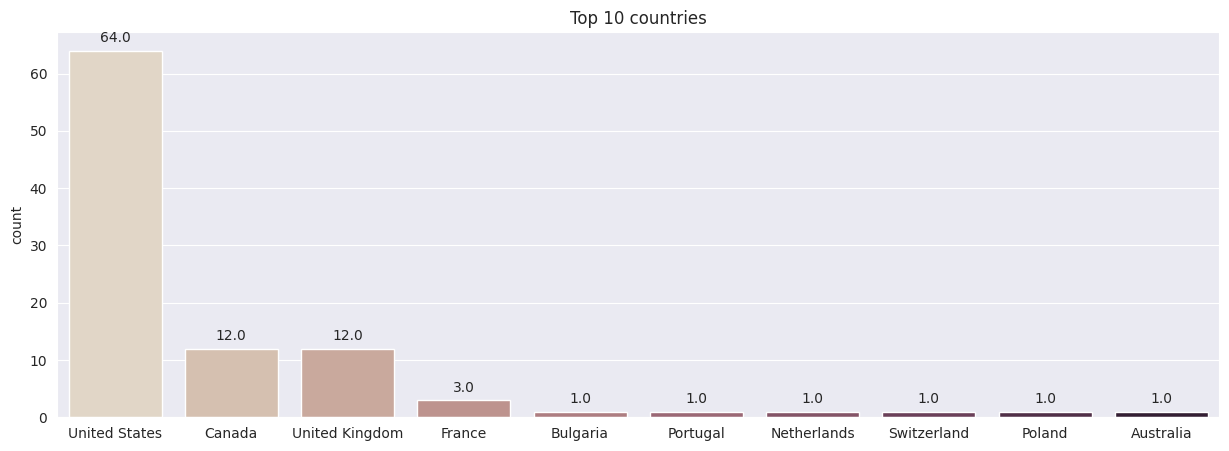

In [44]:
country_count = data.Country.value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'Country': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 countries')

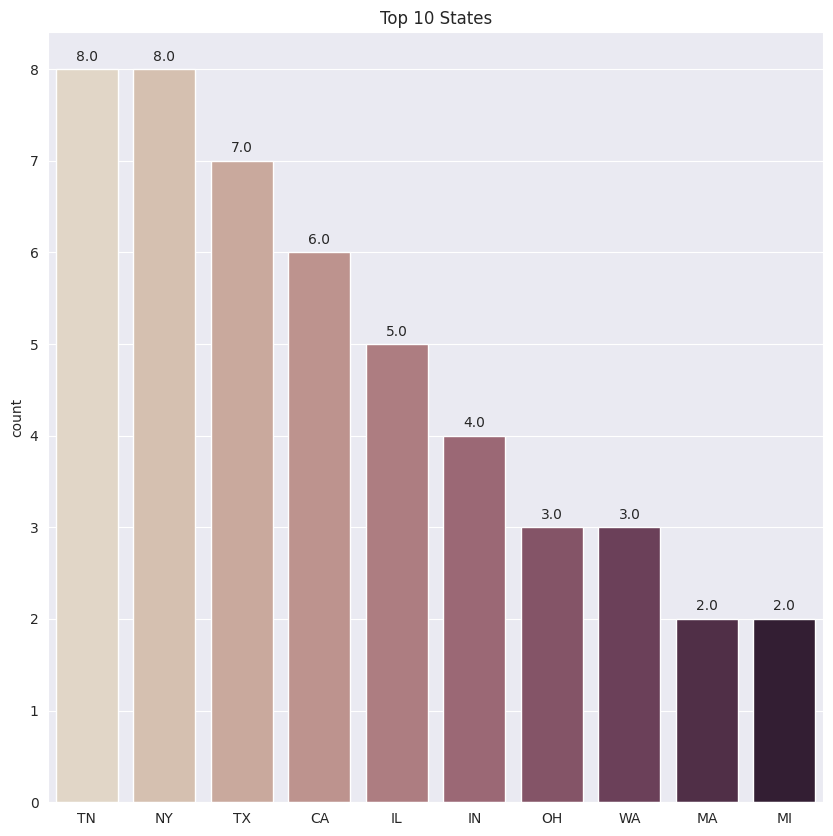

In [45]:
state_count = data.state.value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'state': 'count'})
plt.figure(figsize=(10,10))
ax = sns.barplot(x=state_count.index, y='count', data=state_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 States')

## Country, State and Treatment

For most common countries:

In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Country and trearment",

    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State and trearment",

    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [47]:
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,male,United States,MN,No,No,No,Never,26-100,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN
96,24,male,United States,MO,No,Yes,No,Rarely,26-100,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
97,31,male,Mexico,NaN,No,Yes,Yes,Sometimes,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Yes,No,No,NaN
98,33,male,United States,AZ,No,No,Yes,Sometimes,6-25,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No,NaN


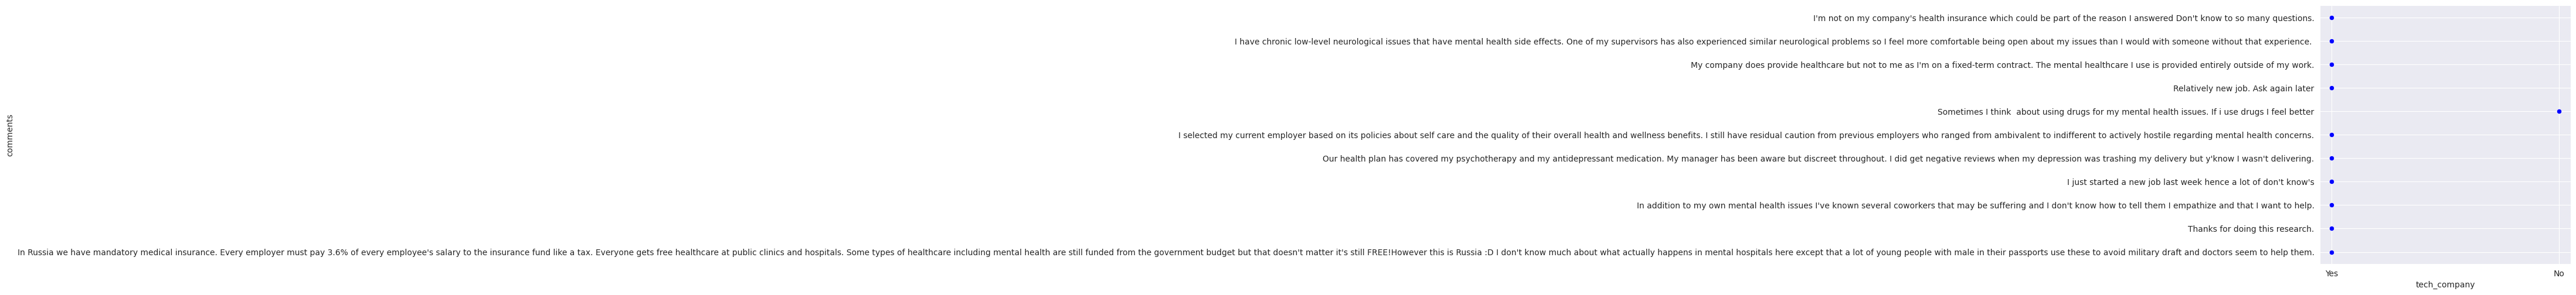

In [48]:
sns.relplot(x="tech_company", y="comments",color = 'b', data=data);

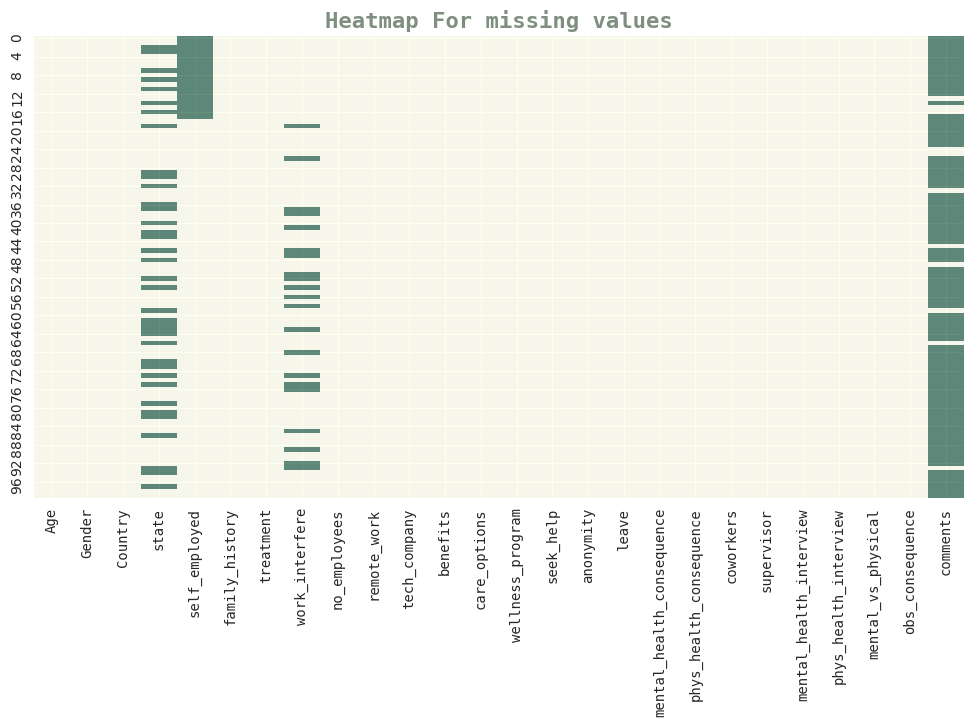

In [49]:

plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(data.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

Are smaller or larger companies more likely to provide people with mental health benefits ?

In [50]:
size_benefits = pd.crosstab(data.no_employees,data.benefits,dropna=False)
size_benefits

benefits,Don't know,No,Yes
no_employees,,,
1-5,2,12,3
100-500,3,2,7
26-100,12,8,12
500-1000,3,0,2
6-25,8,11,4
More than 1000,3,1,7


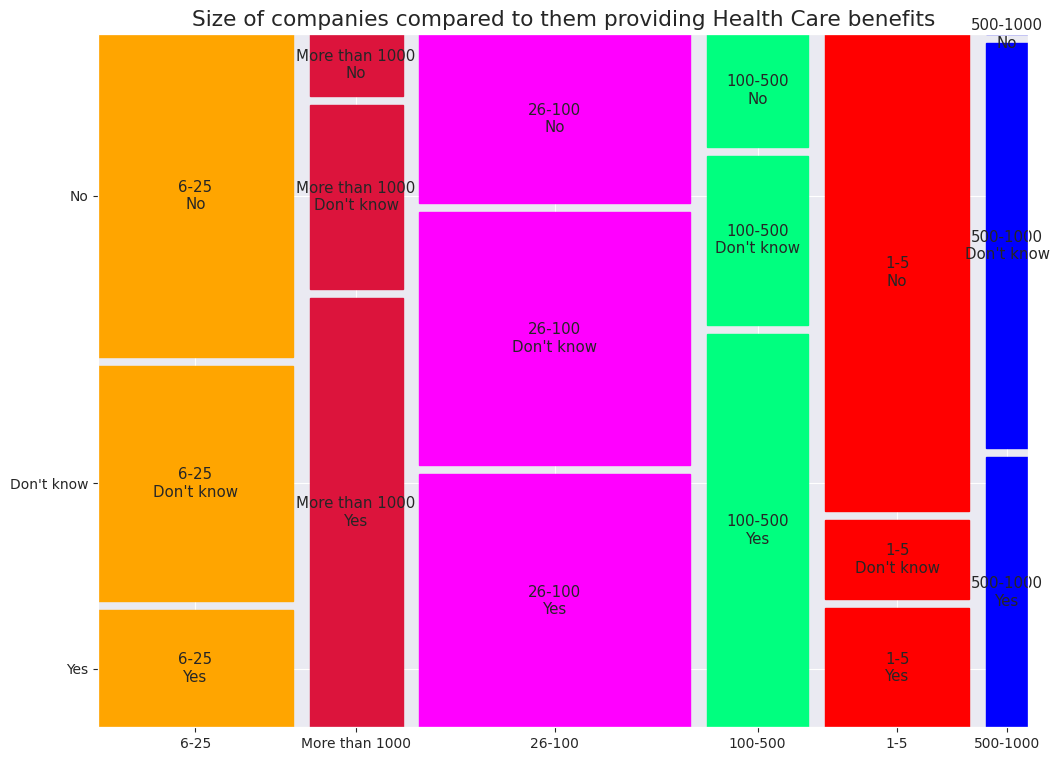

In [51]:
from statsmodels.graphics.mosaicplot import mosaic
fig, axes= plt.subplots(figsize = (12,9))
plt.rcParams['font.size'] = '13'
props = lambda key: {'color': 'r' if '1-5' in key
                     else 'orange' if '6-25' in key
                     else 'magenta' if '26-100' in key
                     else 'springgreen' if '100-500' in key
                     else 'b' if '500-1000' in key
                    else 'crimson' }
mosaic(data,['no_employees', 'benefits'],ax=axes,
       title = 'Size of companies compared to them providing Health Care benefits',properties=props,gap=0.02,)
plt.show()

# How is the distribution of people in doing the survey in the states of US

In [52]:
us_states = data['state'].value_counts()
states = {'Abb' : us_states.index.tolist(), 'count' : us_states.values.tolist()}
states = pd.DataFrame(states)

In [53]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [54]:
list_ = us_states.index.tolist()
values = list(us_state_abbrev.values())
keys = list(us_state_abbrev.keys())
state_names = []
for i in range(0,len(list_)):
    if list_[i] in values:
        state_names.append(keys[values.index(list_[i])])
    else:
        state_names.append(np.NaN)
states['State_names'] = state_names
#state_names

In [55]:
fig = px.scatter_geo(states, locations='Abb',locationmode="USA-states", color='State_names',
                     hover_name='State_names', size='count', scope='usa',
                     labels= {"State_names" : 'US States'},size_max=50,
                     color_discrete_sequence=px.colors.qualitative.Light24,template='plotly_white')
fig.update_layout(title_text='The Distribution of People in doing Survey from the states of US', title_x=0.5)
fig.show()

INFERENCE
We can see that California (CA) has the most number of people participating in the survey with more than 10% of the people participating in US
After California, Washington(WA) comes second by contributing more than 5% people participation.
New York (NY), Tennessee (TN) and Texas(TX) have all have more than 3% people participation but less than 5%Oregon (OR), Illinois(IN), Pennsylvania (PA), Indiana (IN) and Ohio (OH) all have people participation between 2-3%
The rest of the states marked contribute less than 2% from the whole people participation in US.
Some states don’t even contribute anything to the survey!
From this we can infer that the survey is mostly done in places where there are large important cities and popular places. So not so popular states don’t have their people doing the survey!

# How many people are actually willing to seek out treatment?
Due to the stigma surrounding mental health and the alienation of people who are diagnosed with mental health issues very few people actually seek out treatment even after they have a proper diagnosis, this is even more widespread in some Asian countries.

One adult in eight (12.1%) receives mental health treatment, with 10.4% receiving medication and 3% receiving psychological therapy. The overlap within the statistics is due to 1.3% of those receiving treatment reporting receiving both medication and psychological therapy.

For those with common mental health problems, 36.2% reported receiving treatment. The proportion of people with a common mental health problem using mental health treatment has significantly increased. Around one person in four aged 16–74 with symptoms of a common mental health problem was receiving some kind of mental health treatment in 2000 (23.1%) and 2007 (24.4%). By 2014, this has increased to more than one in three (37.3%) (see chart below).2One adult in eight (12.1%) receives mental health treatment, with 10.4% receiving medication and 3% receiving psychological therapy. The overlap within the statistics is due to 1.3% of those receiving treatment reporting receiving both medication and psychological therapy.

For those with common mental health problems, 36.2% reported receiving treatment. The proportion of people with a common mental health problem using mental health treatment has significantly increased. Around one person in four aged 16–74 with symptoms of a common mental health problem was receiving some kind of mental health treatment in 2000 (23.1%) and 2007 (24.4%). By 2014, this has increased to more than one in three (37.3%)

Does providing mental health benefits encourage employees to seek necessary treatment?

In [56]:
btdf = data[(data.benefits == 'Yes') | (data.benefits == 'No')]
b = pd.crosstab(btdf.benefits, btdf.treatment, margins=False)

print("Probability of employee seeking treatment (given no benefits) = ", round((b.iloc[0,1])/(b.iloc[0,0]+b.iloc[0,1]),2))
print("Probability of employee seeking treatment (given benefits) = ", round((b.iloc[1,1])/(b.iloc[1,0]+b.iloc[1,1]),2))
b

Probability of employee seeking treatment (given no benefits) =  0.35
Probability of employee seeking treatment (given benefits) =  0.6


treatment,No,Yes
benefits,,
No,22,12
Yes,14,21


No. of employees with benefits that have sought treatment (Yes, Yes) : 287 ( 39 ) No. of employees without benefits that have sought treatment (No, Yes): 125 ( 17 ) Total no. of employees: 149+125+160+287 = 721 Odds: 39/17 = 2.29

If p-value is less than the level of significance, we can conclude that the probability of having this result by chance is quite small, making the result statistically significant.

# Overall conclusions based on the given data:
While mental health issues may be hereditary, the data collected does not suggest that it is influenced by age or geographical location.

A person's job did not impact their mental health, however most persons indicated that their mental health interfered with their job sometimes.

Most employees are not sure of the level of difficulty associated with taking medical leave due to mental health issues.

Both tech and non-tech companies offered mental health benefits, but a large number of individuals were not sure whether their employer provided any.

Employees may also be wary of making use of these resources offered since a large number of them are unsure if the treatment options are anonymous.

It is difficult to tell whether employees with mental health conditions are treated fairly since there are very few observed negative consequences. However some individuals do think that if the issue of mental health was discussed with their employer, there would be more negative consequences, than if physical health issues were discussed.

A large number of respondents were unsure for many of these questions raised, which suggests that many employers do not inform their employees of the policies, if any, concerning mental health.